(768, 768)


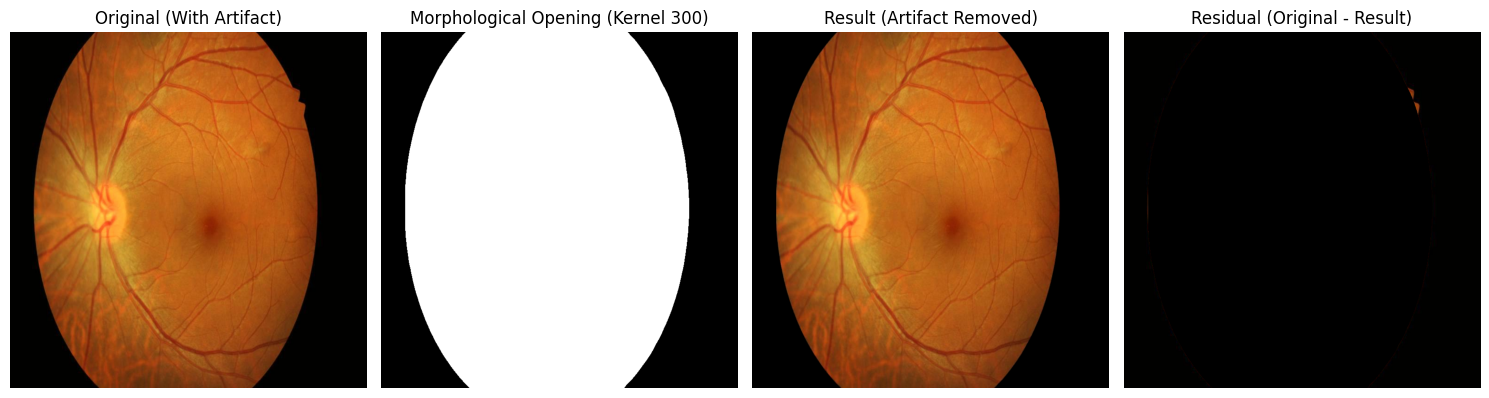

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_name = "/home/magzhan/projects/THOR_DDPM2/THOR_DDPM/data/IDRiD_normalize/train/good/IDRiD_251.jpg"

img = cv2.imread(file_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray.shape)

_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

k_size = 300
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k_size, k_size))

opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

result = cv2.bitwise_and(img_rgb, img_rgb, mask=opened_mask)

residual = img_rgb - result

plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Original (With Artifact)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(opened_mask, cmap='gray')
plt.title(f"Morphological Opening (Kernel {k_size})")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(result)
plt.title("Result (Artifact Removed)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(residual)
plt.title("Residual (Original - Result)")
plt.axis('off')

plt.tight_layout()
plt.show()